In [1]:
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [15]:
len(df)

768

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
imp_col = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

for col in imp_col:
    df[col] = df[col].replace(0, df[col].median())

In [20]:
(df == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

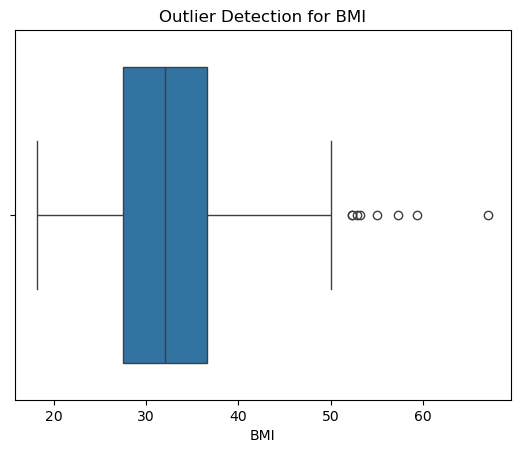

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing outliers for BMI as an example
sns.boxplot(x=df['BMI'])
plt.title('Outlier Detection for BMI')
plt.show()

In [22]:
# We'll use BMI as the example since you just plotted it
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Anything below {lower_limit:.2f} or above {upper_limit:.2f} is an outlier.")

Anything below 13.85 or above 50.25 is an outlier.


In [23]:
# This filters the dataframe to keep only valid BMI rows
df_no_outliers = df[(df['BMI'] >= lower_limit) & (df['BMI'] <= upper_limit)]

# Check how many rows you lost
print("Original shape:", df.shape)
print("New shape:", df_no_outliers.shape)

Original shape: (768, 9)
New shape: (760, 9)


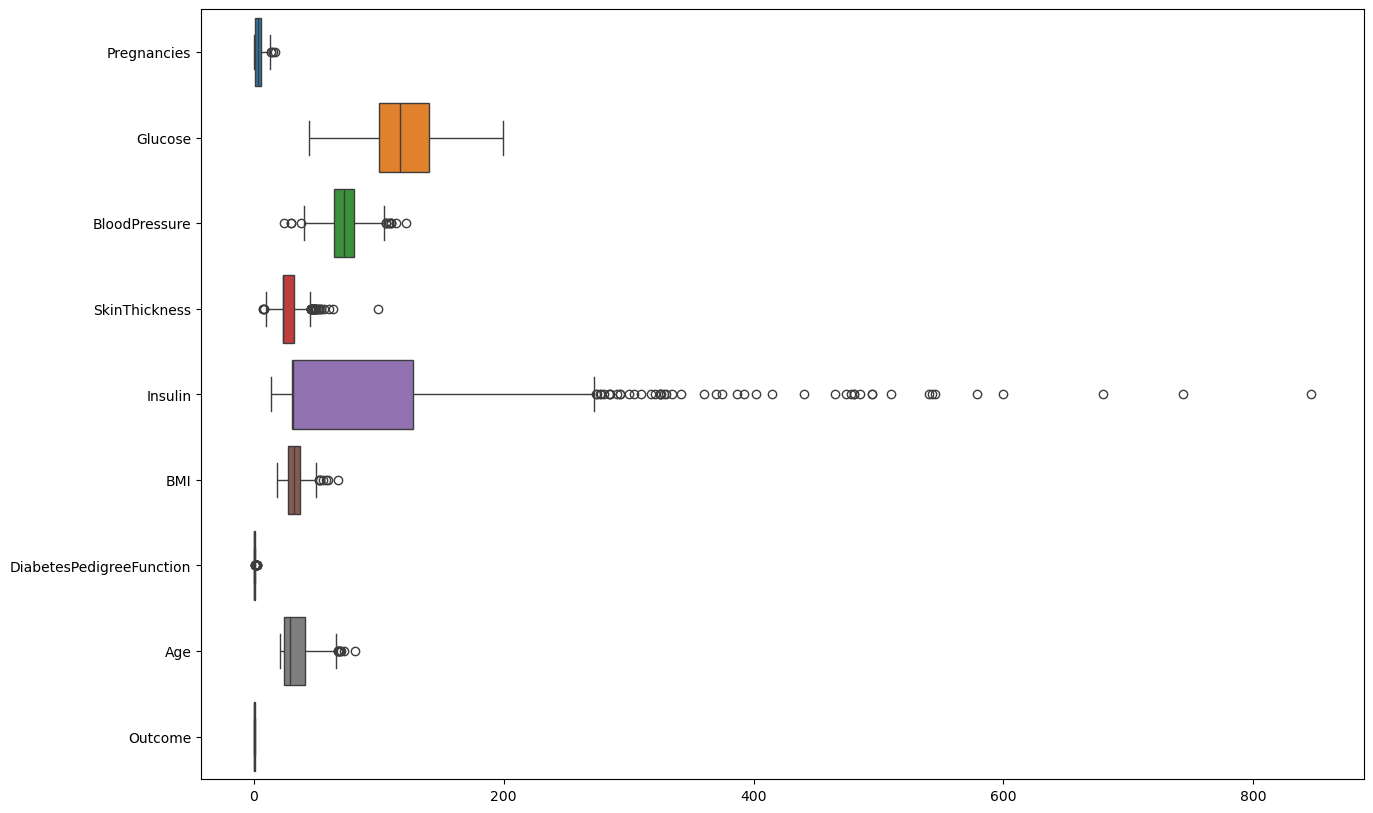

In [24]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, orient="h")
plt.show()

In [25]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Capping: Replace values outside the limits
    df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)
    return df

# Apply to columns with visible outliers in your boxplot
cols_to_fix = ['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction', 'Age']

for col in cols_to_fix:
    df = cap_outliers(df, col)

print("Outliers have been capped!")

Outliers have been capped!


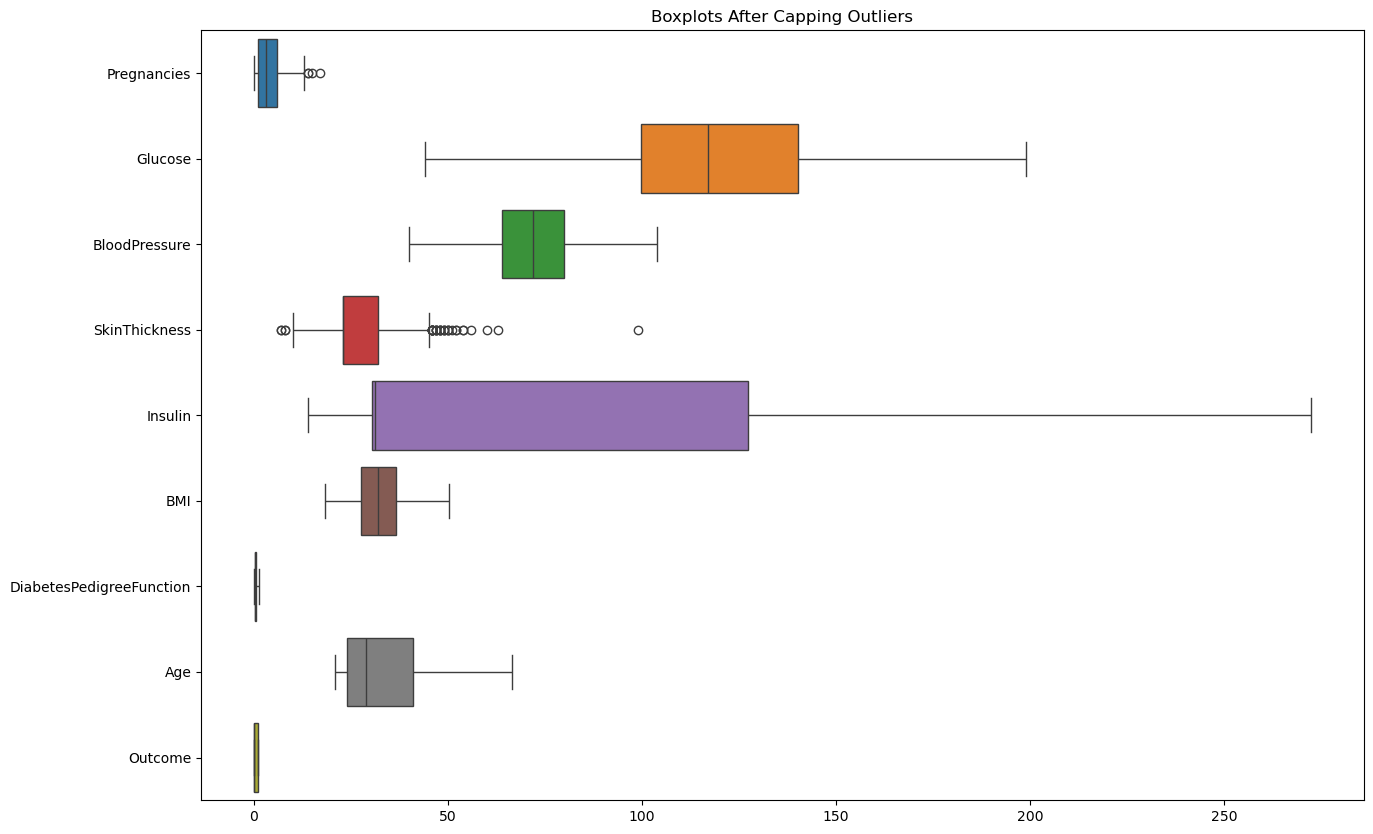

In [26]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, orient="h")
plt.title("Boxplots After Capping Outliers")
plt.show()

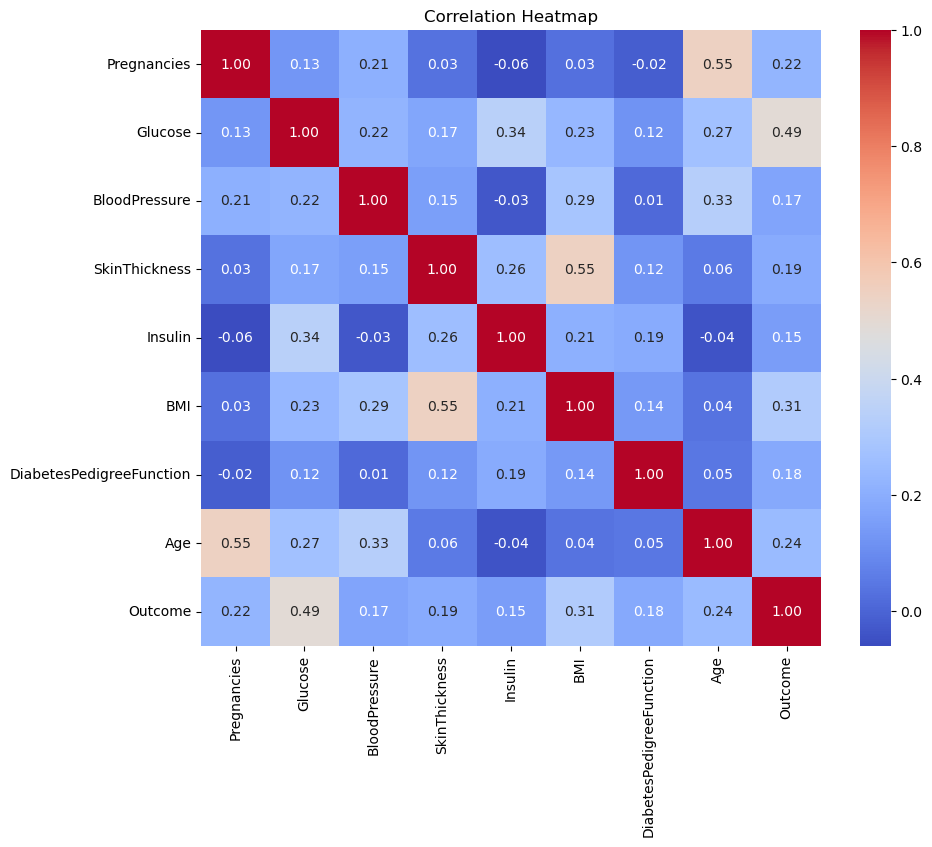

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scaling (Essential for models like Logistic Regression and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train and Predict
for name, model in {"Logistic Regression": log_reg, "Random Forest": rf_clf}.items():
    # Use scaled data for LogReg, though RF doesn't strictly need it
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))

--- Logistic Regression ---
Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

--- Random Forest ---
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



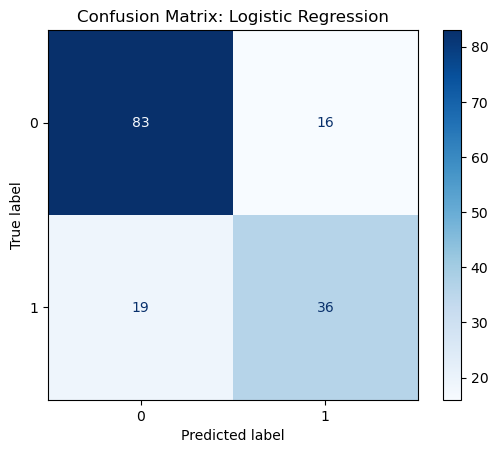

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For Logistic Regression
cm = confusion_matrix(y_test, log_reg.predict(X_test_scaled))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

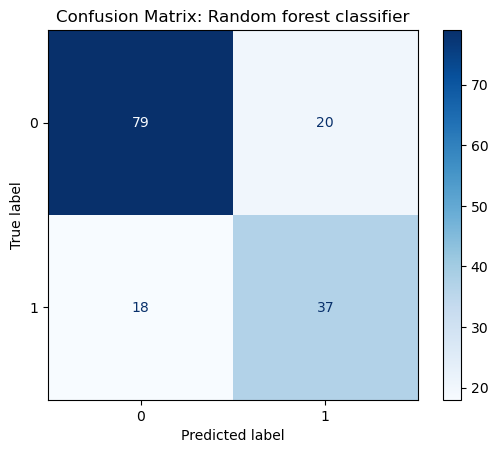

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For Logistic Regression
cm = confusion_matrix(y_test, rf_clf.predict(X_test_scaled))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Random forest classifier")
plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_

print(f"Best Parameters: {grid_search.best_params_}")
print(f"New Accuracy: {best_rf.score(X_test_scaled, y_test):.2f}")

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
New Accuracy: 0.77


C:\Users\panka\AppData\Local\Temp\ipykernel_9976\1595607440.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


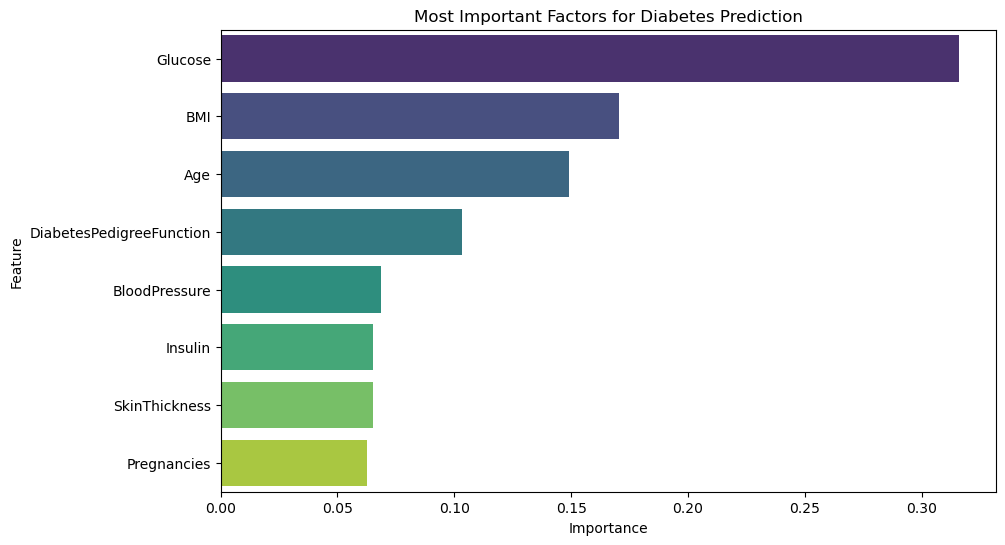

In [37]:
import pandas as pd

importances = best_rf.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Most Important Factors for Diabetes Prediction')
plt.show()